# test ocean.pangeo cloud

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import cartopy
from tqdm.autonotebook import tqdm  # Fancy progress bars for our loops!
import intake
# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
#import util

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'

/srv/conda/envs/notebook/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


In [3]:
col = intake.open_esm_datastore("./pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 35476 entries:
	> 12 activity_id(s)

	> 24 institution_id(s)

	> 49 source_id(s)

	> 54 experiment_id(s)

	> 90 member_id(s)

	> 26 table_id(s)

	> 200 variable_id(s)

	> 8 grid_label(s)

	> 35476 zstore(s)

	> 59 dcpp_init_year(s)

In [45]:
col.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

In [53]:
#col.unique(['activity_id','experiment_id'])

In [5]:
df['experiment_id'].unique()

array(['ssp370', 'piClim-2xDMS', 'piClim-2xdust', 'piClim-2xfire',
       'piClim-2xss', 'piClim-BC', 'piClim-CH4', 'piClim-HC',
       'piClim-N2O', 'piClim-NTCF', 'piClim-OC', 'piClim-SO2',
       'piClim-control', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
       'abrupt-0p5xCO2', 'abrupt-2xCO2', 'abrupt-solm4p', 'abrupt-solp4p',
       'amip-4xCO2', 'amip-future4K', 'amip-lwoff', 'amip-m4K',
       'amip-p4K-lwoff', 'amip-p4K', '1pctCO2', 'abrupt-4xCO2',
       'historical', 'piControl', 'amip', 'esm-hist', 'esm-piControl',
       'ssp245', 'ssp585', 'hist-GHG', 'hist-aer', 'hist-nat',
       'hist-stratO3', 'dcppA-assim', 'dcppA-hindcast',
       'dcppC-hindcast-noAgung', 'dcppC-hindcast-noElChichon',
       'dcppC-hindcast-noPinatubo', 'highresSST-present', 'hist-1950',
       'control-1950', 'land-hist', 'deforest-globe',
       'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126', 'ssp119'],
      dtype=object)

In [4]:
cat = col.search(experiment_id=['ssp585','historical'],  # pick the `historical` forcing experiment
                 table_id='Amon',             # choose to look at atmospheric variables (A) saved at monthly resolution (mon)
                 variable_id='tas',           # choose to look at near-surface air temperature (tas) as our variable
                 member_id = 'r1i1p1f1')      # arbitrarily pick one realization for each model (i.e. just one set of initial conditions)

In [31]:
cat = col.search(experiment_id=['lgm'])      # arbitrarily pick one realization for each model (i.e. just one set of initial conditions)

In [52]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
617,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/historical/r1i...,NaN
922,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/BCC/BCC-ESM1/historical/r1i1p1...,NaN
1249,CMIP,CAMS,CAMS-CSM1-0,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/CAMS/CAMS-CSM1-0/historical/r1...,NaN
2997,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r1i1p...,NaN
6883,CMIP,E3SM-Project,E3SM-1-0,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/E3SM-Project/E3SM-1-0/historic...,NaN
7184,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/EC-Earth-Consortium/EC-Earth3-...,NaN
8882,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
11420,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/MIROC/MIROC6/historical/r1i1p1...,NaN
13363,CMIP,MRI,MRI-ESM2-0,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/MRI/MRI-ESM2-0/historical/r1i1...,NaN
13668,CMIP,NASA-GISS,GISS-E2-1-G-CC,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NASA-GISS/GISS-E2-1-G-CC/histo...,NaN


In [1]:
from dask.distributed import Client
from dask_kubernetes import KubeCluster



In [2]:
from dask_kubernetes import KubeCluster

# create cluster
cluster = KubeCluster() # use default configuration
cluster.adapt(minimum=1, maximum=20) # adaptively scale cluster



In [3]:
# connect to it
from dask.distributed import Client
client = Client(cluster)
client

Client Scheduler: tcp://10.32.12.10:46353 Dashboard: /user/0000-0001-6276-6499/proxy/8787/status,Cluster Workers: 1 Cores: 2 Memory: 11.50 GB


In [6]:
from dask.distributed import Client

client = Client("tcp://10.32.12.10:46443")
client

Client Scheduler: tcp://10.32.12.10:46443 Dashboard: /user/0000-0001-6276-6499/proxy/8787/status,Cluster Workers: 10 Cores: 20 Memory: 115.00 GB


In [2]:
from dask.distributed import Client

client = Client("tcp://10.32.12.10:41139")
client

Client Scheduler: tcp://10.32.12.10:41139 Dashboard: /user/0000-0001-6276-6499/proxy/8787/status,Cluster Workers: 7 Cores: 14 Memory: 80.50 GB


In [5]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 27 group(s)


In [7]:
time_slice = slice('1850','2100') # specific years that bracket our period of interest
ds_dict = {}
gmst_dict = {}
for name, ds in tqdm(dset_dict.items()):
    # rename spatial dimensions if necessary
    if ('longitude' in ds.dims) and ('latitude' in ds.dims):
        ds = ds.rename({'longitude':'lon', 'latitude': 'lat'}) # some models labelled dimensions differently...
        
    ds = xr.decode_cf(ds) # temporary hack, not sure why I need this but has to do with calendar-aware metadata on the time variable
    ds = ds.sel(time=time_slice) # subset the data for the time period of interest
    
    # drop redundant variables (like "height: 2m")
    for coord in ds.coords:
        if coord not in ['lat','lon','time']:
            ds = ds.drop(coord)
    
    ## Calculate global-mean surface temperature (GMST)
    cos_lat_2d = np.cos(np.deg2rad(ds['lat'])) * xr.ones_like(ds['lon']) # effective area weights
    gmst = (
        (ds['tas'] * cos_lat_2d).sum(dim=['lat','lon']) /
        cos_lat_2d.sum(dim=['lat','lon'])
    )
    
    # Add GMST to dictionary
    gmst_dict[name] = gmst.squeeze()
    
    # Add near-surface air temperature to dictionary
    ds_dict[name] = ds

In [10]:
import dask.array as da
x = da.random.random((70000, 70000), chunks=(1000, 1000))
x

,Array,Chunk
Bytes,39.20 GB,8.00 MB
Shape,"(70000, 70000)","(1000, 1000)"
Count,4900 Tasks,4900 Chunks
Type,float64,numpy.ndarray


In [15]:
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z.compute()

array([1.00035403, 1.00037313, 0.9970913 , ..., 1.00161204, 0.99649963,
       0.99888193])

In [19]:
import intake
cat_url = 'https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml'
cat = intake.Catalog(cat_url)

In [39]:
ssp_dict = {}
for name, ds in ds_dict.items():
    if 'ssp' not in name: continue
        
    add_hist_ds = None
    
    # Loop through dictionary to find matching historical simulation
    for hist_name, hist_ds in ds_dict.items():
        model_name = name.split(".")[2] # extract model name from name of simulation
        
        # find historical simulation that matches SSP simulation (same model)
        if (model_name in hist_name) and ('historical' in hist_name):
            add_hist_ds = hist_ds
    
    # if we found one, slice it together with the SSP and add it to the dictionary
    if add_hist_ds is not None:
        ds_ssp = xr.concat([add_hist_ds, ds],dim='time')
        ssp_dict[name] = ds_ssp

In [40]:
ssp_ds = ssp_dict[list(ssp_dict.keys())[0]]
temperature_change = (
    ssp_ds['tas'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_ds['tas'].sel(time=slice('1980','2000')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_ds.attrs)
temperature_change = temperature_change.rename(
    r'temperature change ($^{\circ}$C) from 1980-2000 to 2080-2100'
)

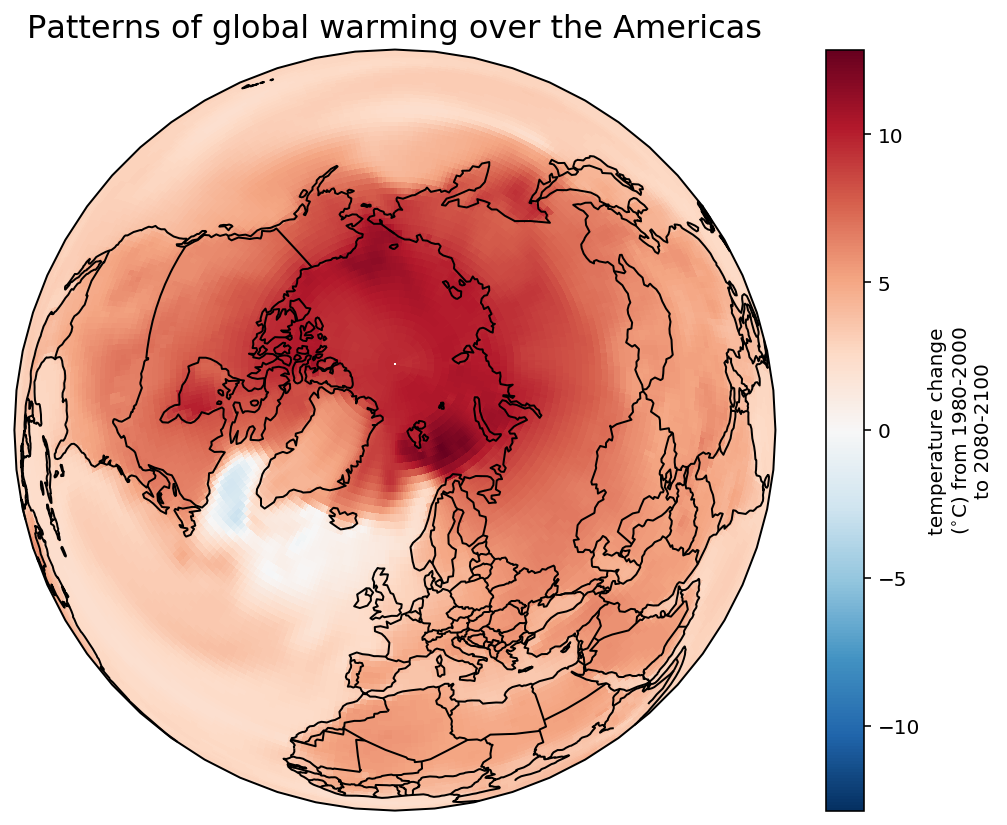

In [43]:
import cartopy.crs as ccrs
ortho = ccrs.Orthographic(0, 80) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(9,7))
ax = plt.subplot(1, 1, 1, projection=ortho)

q = temperature_change.plot(ax=ax, transform = geo) # plot a colormap in transformed coordinates

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
plt.title('Patterns of global warming over the Americas',fontsize=16, ha='center');